In [15]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from pathlib import Path

In [3]:
# Run src/data/combine_annotations.py first to generate the combined annotations file

### Set frame names in lower case

In [4]:
frames = ["Economic","Capacity and resources","Morality","Fairness and equality","Legality, constitutionality and jurisprudence","Policy prescription and evaluation","Crime and punishment","Security and defense","Health and safety","Quality of life","Cultural identity","Public opinion","Political","External regulation and reputation","Other"]
frames = [f.lower() for f in frames]

### Get path of all filtered csv files

In [6]:
filtered_text_path = Path("/projects/frame_align/data/filtered/text")

csv_list = list(filtered_text_path.glob("*.csv"))
csv_list 

[PosixPath('/projects/frame_align/data/filtered/text/2024-03-01_2024-03-31.csv'),
 PosixPath('/projects/frame_align/data/filtered/text/2023-06-01_2023-06-30.csv'),
 PosixPath('/projects/frame_align/data/filtered/text/2023-09-01_2023-09-30.csv'),
 PosixPath('/projects/frame_align/data/filtered/text/2023-11-01_2023-11-30.csv'),
 PosixPath('/projects/frame_align/data/filtered/text/2023-12-01_2023-12-31.csv'),
 PosixPath('/projects/frame_align/data/filtered/text/2023-05-01_2023-05-31.csv'),
 PosixPath('/projects/frame_align/data/filtered/text/2023-10-01_2023-10-31.csv'),
 PosixPath('/projects/frame_align/data/filtered/text/2023-08-01_2023-08-31.csv'),
 PosixPath('/projects/frame_align/data/filtered/text/2024-04-01_2024-04-30.csv'),
 PosixPath('/projects/frame_align/data/filtered/text/2024-01-01_2024-01-31.csv'),
 PosixPath('/projects/frame_align/data/filtered/text/2023-07-01_2023-07-31.csv'),
 PosixPath('/projects/frame_align/data/filtered/text/2024-02-01_2024-02-29.csv')]

### Print a sample data from a randon file

In [12]:
sample_csv_file = csv_list[-1]
sample_df = pd.read_csv(sample_csv_file)
print(sample_df.columns)
sample_df.head()

Index(['topic', 'auto_topic_label', 'id', 'authors', 'date_download',
       'date_modify', 'date_publish', 'description', 'filename', 'image_url',
       'language', 'localpath', 'maintext', 'source_domain', 'title',
       'title_page', 'title_rss', 'url', 'month', 'topic_label'],
      dtype='object')


topic                                   auto_topic_label  \
0      0  49ers_super_scores_game_coach_fans_basketball_...   
1      0  49ers_super_scores_game_coach_fans_basketball_...   
2      0  49ers_super_scores_game_coach_fans_basketball_...   
3      0  49ers_super_scores_game_coach_fans_basketball_...   
4      0  49ers_super_scores_game_coach_fans_basketball_...   

                                     id  \
0  aa8fcbcc-c94a-471b-aedb-55501a3bffa3   
1  280505c6-573f-41be-84f9-779f6eca99b8   
2  60f3971b-54bb-404f-9307-889e28d0fb18   
3  dea23eaf-929f-491a-ba9c-f37535b2e3dd   
4  61b7962b-5e6d-422f-8830-a3f9435d6eef   

                                             authors  \
0  ['Otis Livingston', 'Otis Livingston Is Cbs We...   
1                                                 []   
2                                                 []   
3  ['Marielle Mohs', 'Marielle Mohs Is Thrilled T...   
4                                                 []   

               date_download  date_modify         date_publish  \
0  2024-02-17 00:11:52+00:00          NaN  2024-02-16 18:21:00   
1  2024-02-06 05:27:49+00:00          NaN  2024-02-05 19:02:00   
2  2024-02-25 22:34:15+00:00          NaN  2024-02-24 12:00:00   
3  2024-02-21 03:01:51+00:00          NaN  2024-02-20 19:44:28   
4  2024-02-10 01:00:46+00:00          NaN  2024-02-09 18:38:00   

                                         description  \
0  The Mets are coming off a disastrous 75-win se...   
1  Stephen Curry scored 29 points, Jonathan Kumin...   
2  Miami's Jimmy Butler was among four players ej...   
3  Gopher women's hockey practices feel a little ...   
4  February has been busier than ever for home ba...   

                                            filename  \
0  https%3A%2F%2Fwww.cbsnews.com%2Fnewyork%2Fnews...   
1  https%3A%2F%2Fwww.cbsnews.com%2Fsanfrancisco%2...   
2  https%3A%2F%2Fwww.cbsnews.com%2Fmiami%2Fnews%2...   
3  https%3A%2F%2Fwww.cbsnews.com%2Fminnesota%2Fne...   
4  https%3A%2F%2Fwww.cbsnews.com%2Ftexas%2Fvideo%...   

                                           image_url language  localpath  \
0  https://assets1.cbsnewsstatic.com/hub/i/r/2024...       en        NaN   
1  https://assets1.cbsnewsstatic.com/hub/i/r/2024...       en        NaN   
2  https://assets3.cbsnewsstatic.com/hub/i/r/2024...       en        NaN   
3  https://assets1.cbsnewsstatic.com/hub/i/r/2024...       en        NaN   
4  https://assets2.cbsnewsstatic.com/hub/i/r/2024...       en        NaN   

                                            maintext    source_domain  \
0  Mets have high hopes for 2024 under rookie man...  www.cbsnews.com   
1  Stephen Curry scored 29 points, Jonathan Kumin...  www.cbsnews.com   
2  New Orleans Pelicans forward Zion Williamson (...  www.cbsnews.com   
3  MINNEAPOLIS — Gopher women's hockey practices ...  www.cbsnews.com   
4  Super Bowl 'Tay Treats' bring business boom to...  www.cbsnews.com   

                                               title  title_page  title_rss  \
0  Mets have high hopes under rookie manager Carl...         NaN        NaN   
1  Stephen Curry scores 29 points, Warriors overc...         NaN        NaN   
2  Heat's Jimmy Butler, 3 others, ejected after s...         NaN        NaN   
3  Gopher hockey's Skylar Vetter has big goals, w...         NaN        NaN   
4  Super Bowl 'Tay Treats' bring business boom to...         NaN        NaN   

                                                 url                  month  \
0  https://www.cbsnews.com/newyork/news/mets-spri...  2024-02-01_2024-02-29   
1  https://www.cbsnews.com/sanfrancisco/news/step...  2024-02-01_2024-02-29   
2  https://www.cbsnews.com/miami/news/heats-jimmy...  2024-02-01_2024-02-29   
3  https://www.cbsnews.com/minnesota/news/gopher-...  2024-02-01_2024-02-29   
4  https://www.cbsnews.com/texas/video/super-bowl...  2024-02-01_2024-02-29   

  topic_label  
0      Sports  
1      Sports  
2      Sports  
3      Sports  
4      Sports

### Gte topic names

In [13]:
topic_label_list = []

for each_csv_file in tqdm(csv_list):
    df = pd.read_csv(each_csv_file)
    topic_label_list.extend(df["topic_label"].tolist())
    
topic_label_list = list(set(topic_label_list))
print(f"Total number of unique topic labels: {len(topic_label_list)}")
print(topic_label_list)

Total number of unique topic labels: 73
['Agriculture', 'Games', 'Literature', 'Environment', 'Law', 'Natural Disasters', 'Health', 'Terrorism', 'Travel', 'History', 'Religion', 'Aviation', 'Automotive', 'Transportation', 'Charity', 'Infrastructure', 'Food', 'Gambling', 'Archaeology', 'Nature', 'Psychology', 'Culture', 'Weather', 'Entertainment', 'Business', 'Sports', 'Labor', 'Economy', 'Crime', 'Science', 'Miscellaneous', 'Lottery', 'Conflict', 'News', 'Insurance', 'Obituary', 'Military', 'Shopping', 'Consumer', 'Pets', 'Events', 'Arts', 'International Aid', 'Urban Development', 'Law Enforcement', 'Education', 'Finance', 'Media', 'Immigration', 'International Relations', 'Real Estate', 'Humanitarian', 'Astrology', 'Technology', 'Odd News', 'Energy', 'Family', 'Advertising', 'Society', 'Lifestyle', 'Politics', 'Fashion', 'Demographics', 'Traffic', 'Safety', 'Wildlife', 'Celebrity', 'Royalty', 'Outdoors', 'Relationships', 'Social Issues', 'Photography', 'Accidents']


### Show a histogram of popular topics by seeing the number of files that have that topic

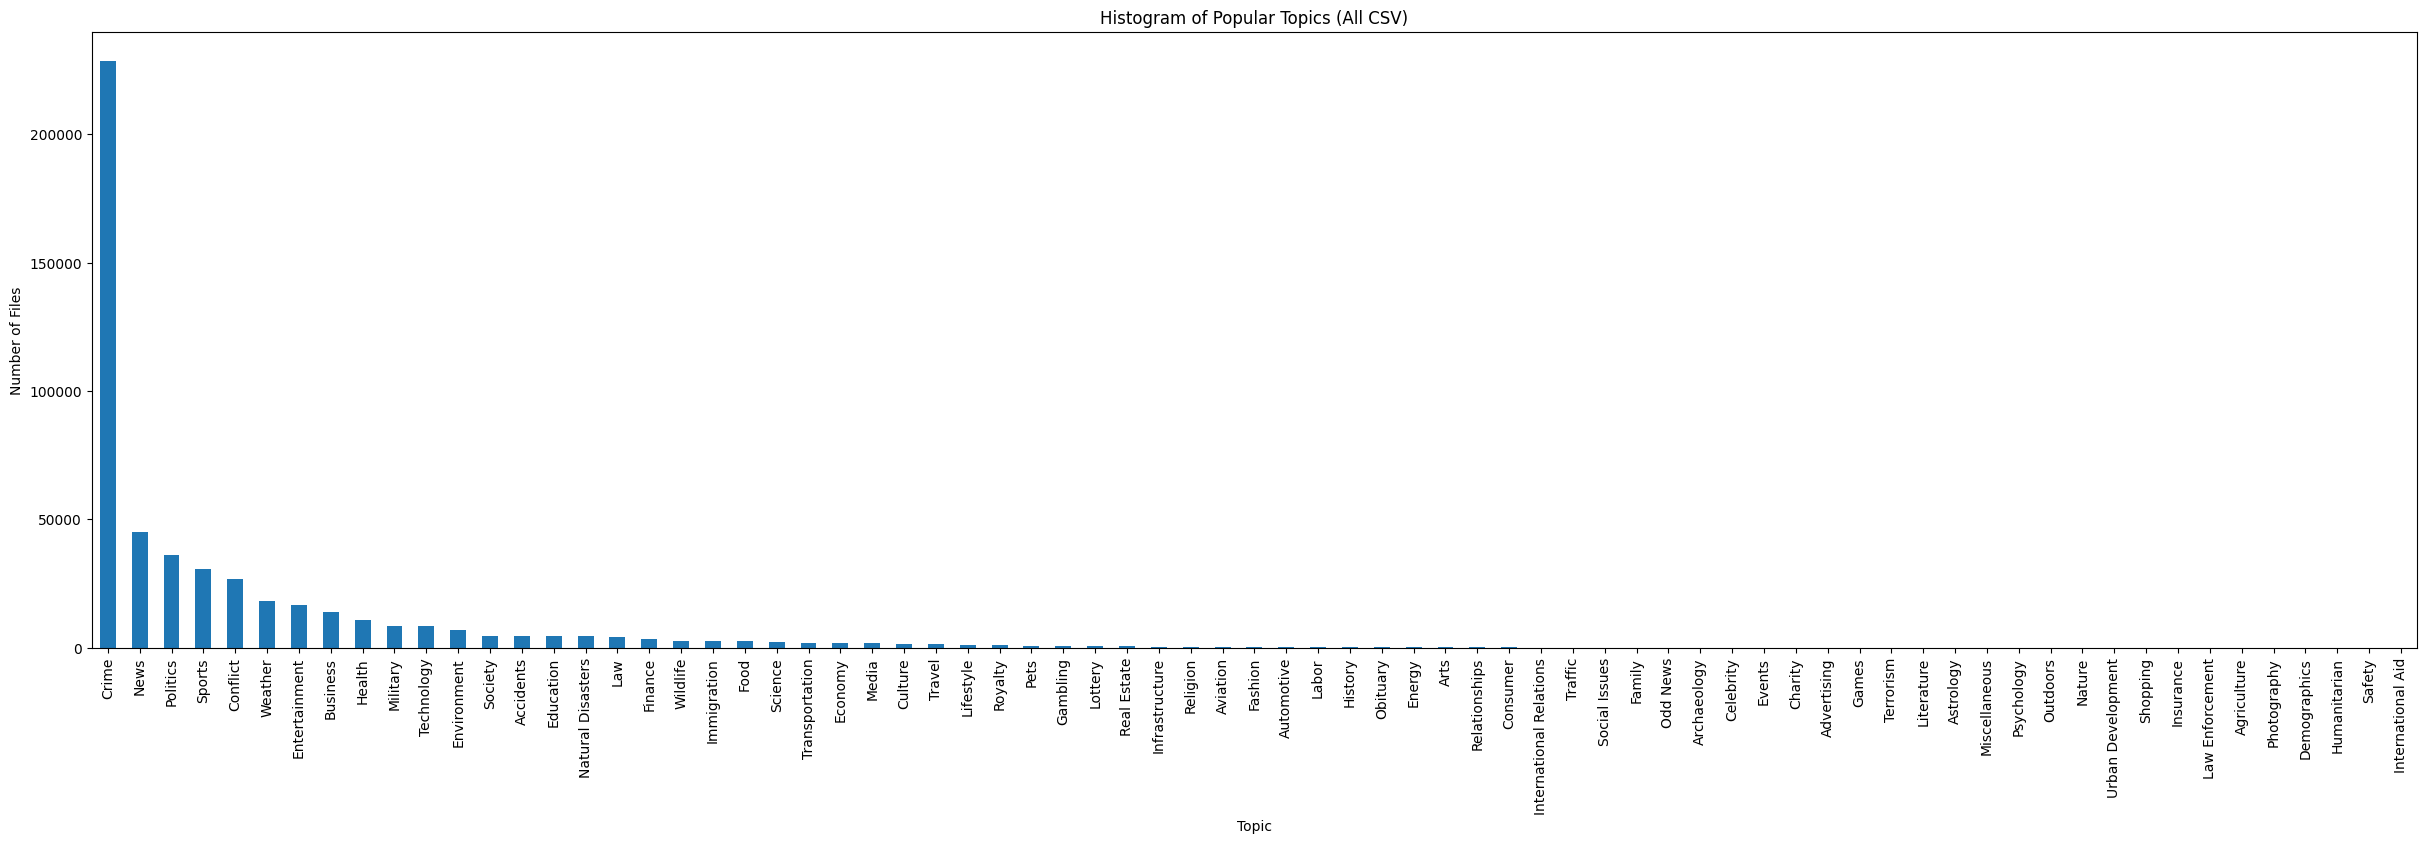

In [43]:
# Combine all CSV data, then count how many rows each topic_label has
all_dfs = []
for f in csv_list:
    all_dfs.append(pd.read_csv(f))
all_data = pd.concat(all_dfs, ignore_index=True)

topic_counts_all = all_data["topic_label"].value_counts()

plt.figure(figsize=(30, 8))
topic_counts_all.plot(kind='bar')
plt.xlabel("Topic")
plt.ylabel("Number of Files")
plt.title("Histogram of Popular Topics (All CSV)")
plt.show()


### Show a histogram of popular topics by seeing the number of files that have that topic, except 'Crime'

(72,)


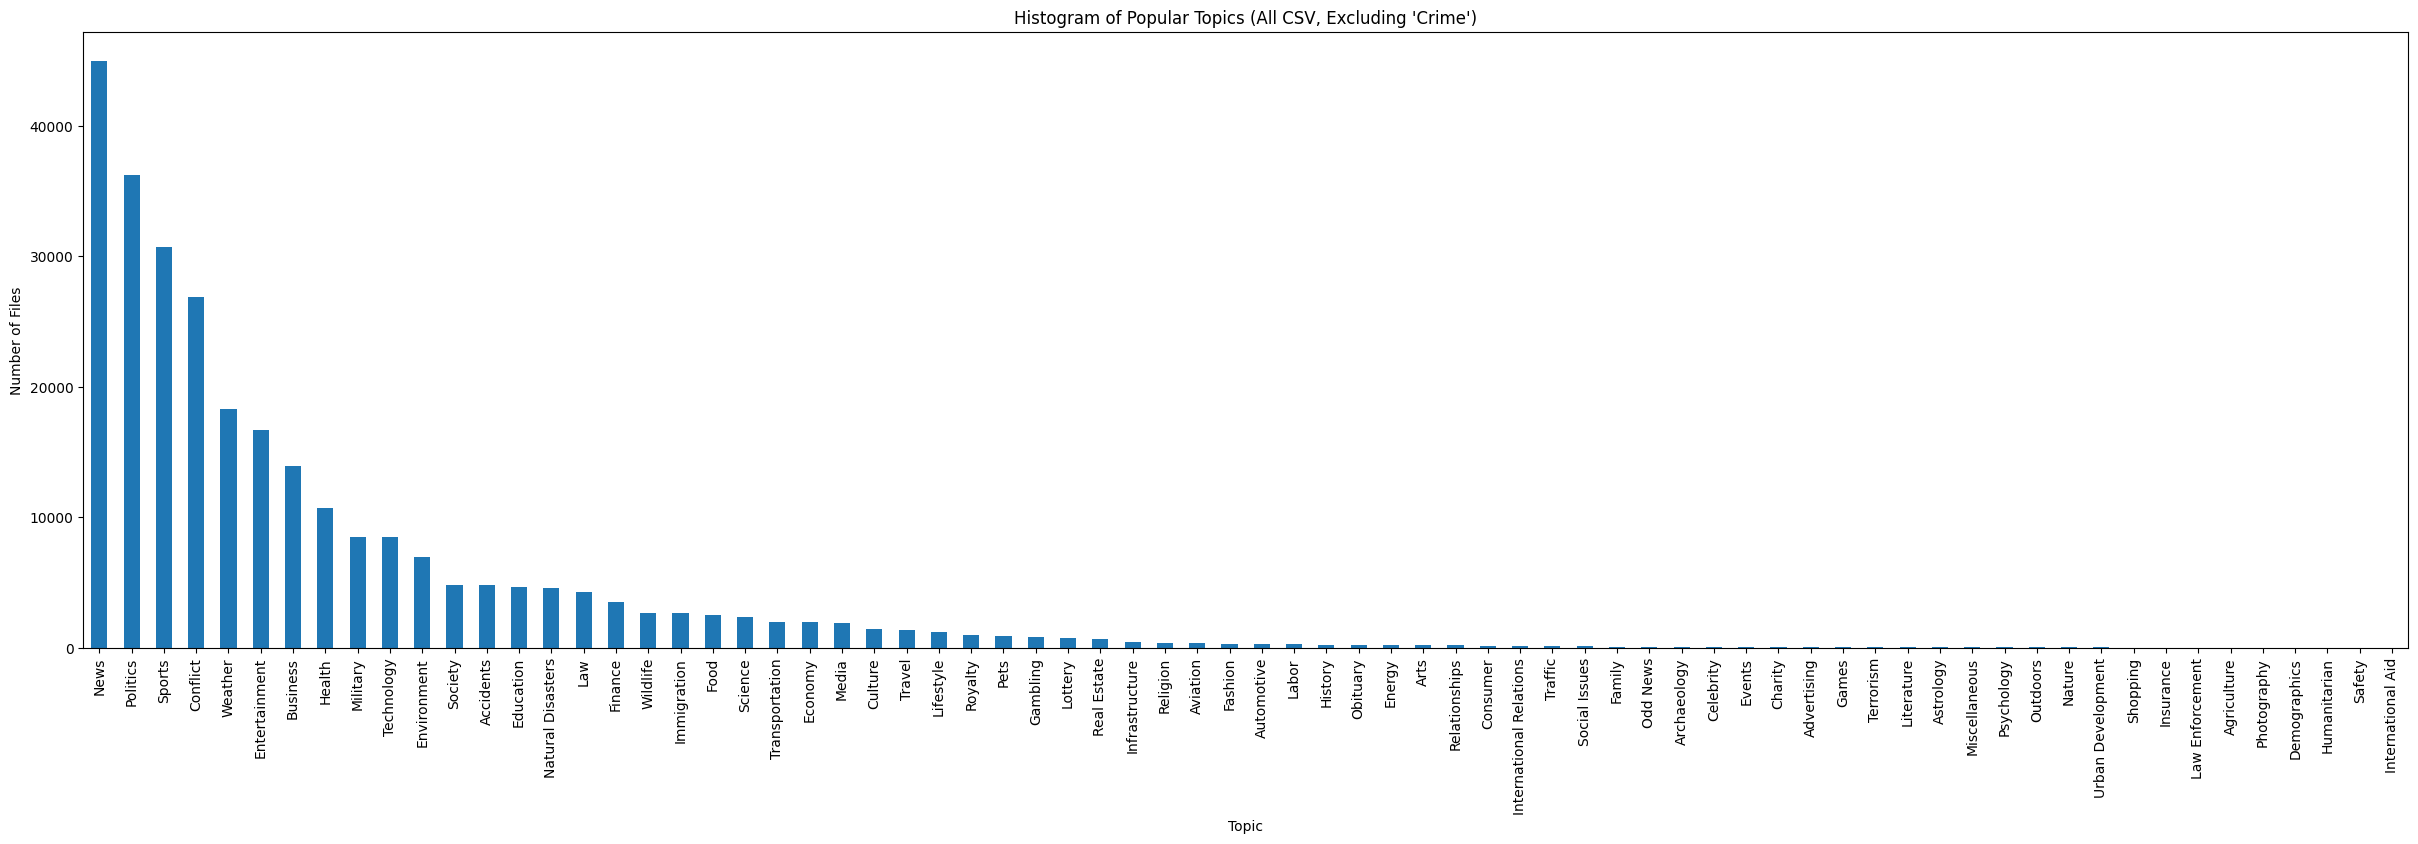

In [44]:
# Exclude 'Crime' topic while plotting
topic_counts_all_excluding_crime = topic_counts_all.drop('Crime')
print(topic_counts_all_excluding_crime.shape)

plt.figure(figsize=(30, 8))
topic_counts_all_excluding_crime.plot(kind='bar')
plt.xlabel("Topic")
plt.ylabel("Number of Files")
plt.title("Histogram of Popular Topics (All CSV, Excluding 'Crime')")
plt.show()

### Get 100 samples per topic for topics with more than 2000 samples

In [90]:
# Filter topics with at least 500 data points
min_samples = 2000
filtered_topics = topic_counts_all[topic_counts_all >= min_samples].index

# Get 50 samples for each filtered topic. If a topic has less than 50 samples, then get all samples
sampled_data = []
for topic in filtered_topics:
    topic_df = all_data[all_data["topic_label"] == topic]
    sampled_data.append(topic_df.sample(n=100, random_state=1) if topic_df.shape[0] > 50 else topic_df)
sampled_data = pd.concat(sampled_data, ignore_index=True)

print(f"Total number of samples: {sampled_data.shape[0]}")
sampled_data.head(2)

Total number of samples: 2300


topic                                             auto_topic_label  \
0     -1  man_police_new_woman_year_old_school_county_arrested_review   
1     -1    man_woman_school_police_new_city_year_old_review_shooting   

                                     id          authors  \
0  5141d64c-1566-4529-84c2-210ce3f7d6e4               []   
1  78951db5-792e-4734-b4f6-8b9b8f33706b  ['Michael Lee']   

               date_download  date_modify         date_publish  \
0  2023-08-14 00:49:41+00:00          NaN  2023-08-13 23:23:12   
1  2023-05-28 16:15:48+00:00          NaN  2023-05-28 10:39:50   

                                                                                           description  \
0  Raiders rookie quarterback Aidan O'Connell completed 15 of 18 passes for 141 yards and a touchdo...   
1  Two Georgia Lululemon employees, including an assistant manager, were fired after taking video a...   

                                                                                              filename  \
0  https%3A%2F%2Fwww.cbsnews.com%2Fsacramento%2Fnews%2Foconnell-efficient-in-leading-raiders-to-a-3...   
1  https%3A%2F%2Fwww.foxbusiness.com%2Fretail%2Flululemon-employees-fired-after-chasing-robbers-out...   

                                                                                             image_url  \
0  https://assets3.cbsnewsstatic.com/hub/i/r/2023/08/13/b7ae9ef8-6f48-4a97-aa59-0c1029ba2c58/thumbn...   
1  https://a57.foxnews.com/static.foxbusiness.com/foxbusiness.com/content/uploads/2022/09/0/0/Getty...   

  language  localpath  \
0       en        NaN   
1       en        NaN   

                                                                                              maintext  \
0  Raiders rookie quarterback Aidan O'Connell passed for 141 yards and a touchdown in a highly effi...   
1  Two Lululemon employees in Georgia are speaking out after they say they were fired for calling p...   

         source_domain  \
0      www.cbsnews.com   
1  www.foxbusiness.com   

                                                                       title  \
0  O'Connell efficient in leading Raiders to a 34-7 preseason win over 49ers   
1       Lululemon employees fired after chasing robbers out of store: report   

   title_page  title_rss  \
0         NaN        NaN   
1         NaN        NaN   

                                                                                                   url  \
0  https://www.cbsnews.com/sacramento/news/oconnell-efficient-in-leading-raiders-to-a-34-7-preseaso...   
1  https://www.foxbusiness.com/retail/lululemon-employees-fired-after-chasing-robbers-out-store-report   

                   month topic_label  
0  2023-08-01_2023-08-31       Crime  
1  2023-05-01_2023-05-31       Crime

### Display data in table format

In [91]:
# Show all columns in a pandas DataFrame
pd.set_option('display.max_columns', None)


In [92]:
# 1) Group by (month, topic_label) and count the number of rows in each group
final_sampled_df_counts = sampled_data.groupby(['month', 'topic_label']).size().unstack(fill_value=0)

# 2) Insert a new column "total_per_month" at the beginning with the total count of rows per month
final_sampled_df_counts.insert(0, 'total_per_month', final_sampled_df_counts.sum(axis=1))

# 3) Show the resulting pivoted dataframe of counts
final_sampled_df_counts


topic_label            total_per_month  Accidents  Business  Conflict  Crime  \
month                                                                          
2023-05-01_2023-05-31              258          8        14         0     21   
2023-06-01_2023-06-30              183         13         9         0      0   
2023-07-01_2023-07-31              241         17        21         0     26   
2023-08-01_2023-08-31              271          8        12         0     27   
2023-09-01_2023-09-30              218         14         7         0      0   
2023-10-01_2023-10-31              245          4         6        96      1   
2023-11-01_2023-11-30              110          3         3         0     11   
2023-12-01_2023-12-31              112          8         1         2      7   
2024-01-01_2024-01-31              234          5         7         0      0   
2024-02-01_2024-02-29              118          8         5         2      0   
2024-03-01_2024-03-31              128          7         9         0      5   
2024-04-01_2024-04-30              182          5         6         0      2   

topic_label            Education  Entertainment  Environment  Finance  Food  \
month                                                                         
2023-05-01_2023-05-31         11             16           17        5     0   
2023-06-01_2023-06-30         12              5            8        9     7   
2023-07-01_2023-07-31          8              9            6        2     6   
2023-08-01_2023-08-31         10             17           20        5     7   
2023-09-01_2023-09-30         10             10           17        8    27   
2023-10-01_2023-10-31          4             11            8       40     1   
2023-11-01_2023-11-30          7              5            2        2    20   
2023-12-01_2023-12-31         10              5            4        3     1   
2024-01-01_2024-01-31         10              1            3       10     8   
2024-02-01_2024-02-29         10              6            5        4     7   
2024-03-01_2024-03-31          6              8            6        5     7   
2024-04-01_2024-04-30          2              7            4        7     9   

topic_label            Health  Immigration  Law  Military  Natural Disasters  \
month                                                                          
2023-05-01_2023-05-31      15           13   19        17                  9   
2023-06-01_2023-06-30       7           11   13        12                 11   
2023-07-01_2023-07-31      14            3    6        14                 11   
2023-08-01_2023-08-31      12           19   10        14                 20   
2023-09-01_2023-09-30       8           20    4         2                  2   
2023-10-01_2023-10-31      10            1   10         2                  5   
2023-11-01_2023-11-30       4           12    5         2                  6   
2023-12-01_2023-12-31       1            8    4         0                  9   
2024-01-01_2024-01-31      12            9   12        22                 11   
2024-02-01_2024-02-29       6            1    3         4                  8   
2024-03-01_2024-03-31       9            0    5         0                  6   
2024-04-01_2024-04-30       2            3    9        11                  2   

topic_label            News  Politics  Science  Society  Sports  Technology  \
month                                                                         
2023-05-01_2023-05-31     0        11        6       17      17          17   
2023-06-01_2023-06-30     0        18        7        3      10           7   
2023-07-01_2023-07-31     1         7        5        6      10          17   
2023-08-01_2023-08-31     0         7       12       17       6          10   
2023-09-01_2023-09-30     0         9       13        7      18           7   
2023-10-01_2023-10-31     0         4       13        5       7           7   
2023-11-01_2023-11-

### Display as heatmap

Total number of topics: 23


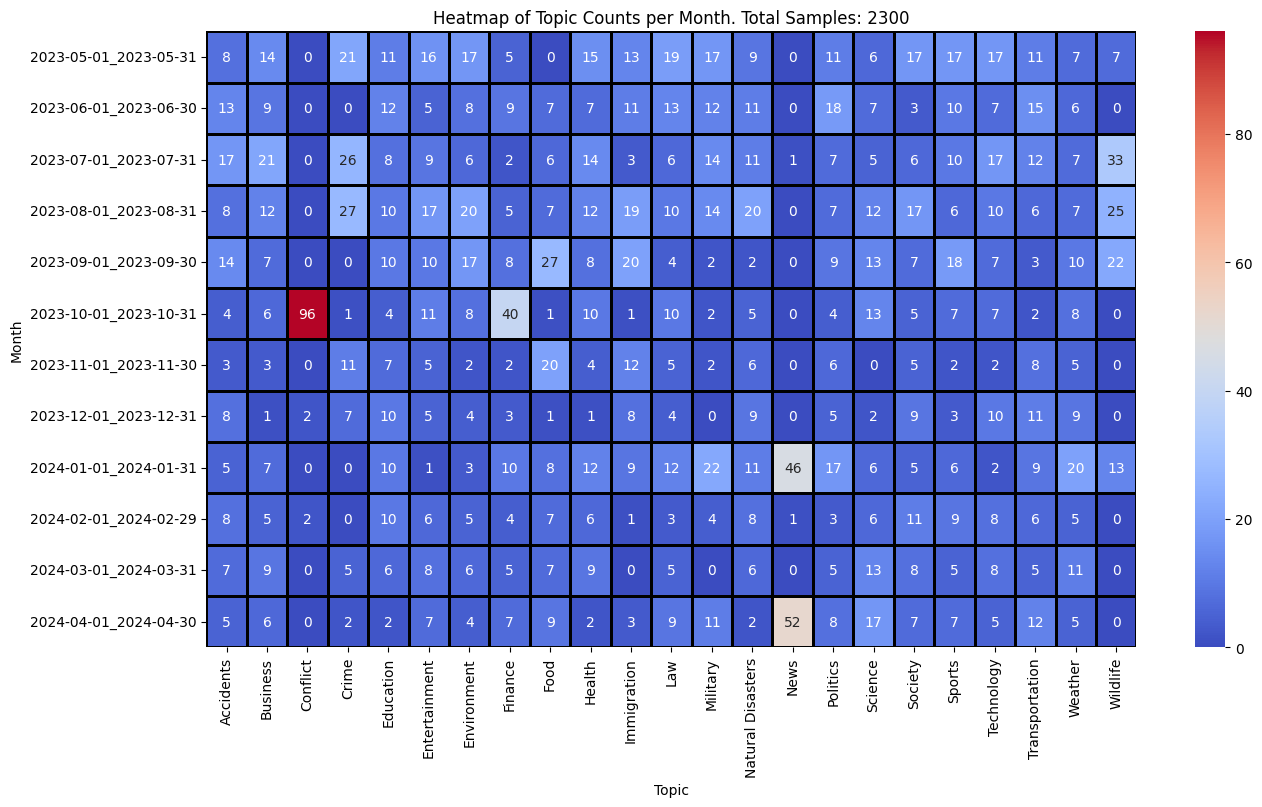

In [99]:
import seaborn as sns

# Plot final_sampled_df_counts as a heatmap with the total number of samples per month
plt.figure(figsize=(15, 8))
heatmap_df = final_sampled_df_counts.copy()
heatmap_df = heatmap_df.drop(columns=['total_per_month'])

sns.heatmap(heatmap_df, annot=True, fmt="d", cmap='coolwarm', linewidths=2, linecolor='black')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.xlabel('Topic')
plt.ylabel('Month')
plt.title(f'Heatmap of Topic Counts per Month. Total Samples: {sampled_data.shape[0]}')
print(f"Total number of topics: {len(heatmap_df.columns)}")
plt.show()


### Save the filtered data to a new file

In [105]:
## Save the data to a CSV file
sampled_data.to_csv("sampled_data_dec20.csv", index=False)

### Get path of image files

In [104]:
import shutil
from glob import glob

# Create the images directory if it doesn't exist
image_dir = Path("images_dec20")
image_dir.mkdir(exist_ok=True)

# Get all ids from the 'id' column
ids = sampled_data['id'].tolist()
print(f"Total number of ids: {len(ids)}")

# Create a list of all directories in the vision directory. dont count subdirectories or files
vision_dirs = [d for d in Path("/projects/frame_align/data/filtered/vision").iterdir() if d.is_dir()]
print(f"Total number of directories: {len(vision_dirs)}")

# Find the directory that contains the image with the id + ".jpg" and copy it to the images directory
for i, id_ in enumerate(tqdm(ids)):
    image_found = False
    for d in vision_dirs:
        img_path = d / f"{id_}.jpg"
        if img_path.exists():
            try:
                shutil.copy(img_path, image_dir / f"{id_}.jpg")
                image_found = True
                break
            except Exception as e:
                print(f"Error copying {img_path}: {e}")
    if not image_found:
        print(f"Image for ID {id_} not found in any directory.")


Total number of ids: 2300
Total number of directories: 12


100%|██████████| 2300/2300 [01:46<00:00, 21.51it/s]
